In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision', 4)
pd.set_option('display.max_rows', 12)
pd.set_option('display.max_columns', 12)
pd.set_option('display.float_format', '{:20,.5f}'.format)

plt.style.use('seaborn')

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

carseats = sm.datasets.get_rdataset("Carseats",package="ISLR") ## dataset 없이도 가져옴
carseats = carseats.data

carseats['High'] = (carseats['Sales'] > 8).map({True: 'Yes', False: 'No'})
## Sales 8 기준으로 Yes/No

carseats.loc[:, ['ShelveLoc', 'Urban', 'US', 'High']] = \
carseats.loc[:, ['ShelveLoc', 'Urban', 'US', 'High']].apply(pd.Categorical) ## 카테고리컬 변수로 지정

In [3]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50000,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
1,11.22000,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
2,10.06000,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
3,7.40000,117,100,4,466,97,Medium,55,14,Yes,Yes,No
4,4.15000,141,64,3,340,128,Bad,38,13,Yes,No,No


In [4]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le = LabelEncoder()
carseats['ShelveLoc'] = le.fit_transform(carseats['ShelveLoc'])
carseats['Urban'] = le.fit_transform(carseats['Urban'])
carseats['US'] = le.fit_transform(carseats['US'])
## 위 세 가지 변수를 label encoder로 문자를 수치로 변환

X = carseats.loc[:, 'CompPrice':'US']
y = carseats.loc[:, 'High']
## 아까 지정한 High를 예측 변수로, Comprice부터 US까지를 설명 변수로 지정

carseats.head() ## 확인용: Yes는 1, No는 0으로 들어갔네요. ShelveLoc의 경우 알파벳 순으로 0~2까지.

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50000,138,73,11,276,120,0,42,17,1,1,Yes
1,11.22000,111,48,16,260,83,1,65,10,1,1,Yes
2,10.06000,113,35,10,269,80,2,59,12,1,1,Yes
3,7.40000,117,100,4,466,97,2,55,14,1,1,No
4,4.15000,141,64,3,340,128,0,38,13,1,0,No


In [5]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
## decision tree 분류문제니까,, 나중에 Regressor도 나옴

tree_carseats = DecisionTreeClassifier(min_samples_leaf=5, max_depth=6)
## parameter 지정

tree_carseats.fit(X, y)
y_pred = tree_carseats.predict(X)

tree_carseats.score(X, y)

0.8775

In [6]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


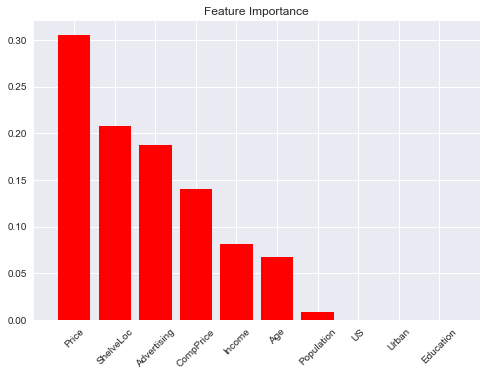

In [7]:
# 변수 중요도

from scikitplot.estimators import plot_feature_importances

plot_feature_importances(tree_carseats, ## 아까 만든 decision tree에서 X변수 중요도 그림
                         feature_names=X.columns,  # X의 열을 feature로 이용
                         x_tick_rotation=45); ## X축 변수 이름이 안 겹치게 45도 회전시켜서 display

In [8]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [9]:
from sklearn.model_selection import train_test_split
## train test 분할(절반씩 나눴는데 임의 지정 가능. test를 0.2로 하거나 등등)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=42)

In [10]:
tree_carseats_tt = DecisionTreeClassifier(min_samples_leaf=5, max_depth=6)
tree_carseats_tt.fit(X_train, y_train)
## 아까 만들어놓은 classifier에 train data 이용해서 적합하고
## 예측한 후에 score 확인
y_pred = tree_carseats_tt.predict(X_test)

tree_carseats_tt.score(X_train, y_train), tree_carseats_tt.score(X_test, y_test)

(0.9, 0.73)

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.81      0.71      0.75       117
         Yes       0.65      0.76      0.70        83

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200



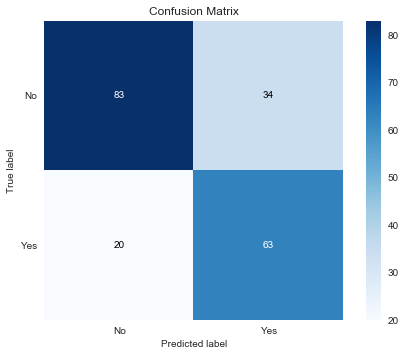

In [12]:
from scikitplot.metrics import plot_confusion_matrix

plot_confusion_matrix(y_test, y_pred);

In [13]:
## 여기서부터 Regression

In [14]:
boston = sm.datasets.get_rdataset("Boston",package="MASS") ## dataset 없이도 가져옴
boston = boston.data

X = boston.loc[:, 'crim':'lstat']
y = boston.loc[:, 'medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=42)

In [15]:
boston.head()

,crim,zn,indus,chas,nox,rm,...,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.00000,2.31000,0,0.53800,6.57500,...,1,296,15.30000,396.90000,4.98000,24.00000
1,0.02731,0.00000,7.07000,0,0.46900,6.42100,...,2,242,17.80000,396.90000,9.14000,21.60000
2,0.02729,0.00000,7.07000,0,0.46900,7.18500,...,2,242,17.80000,392.83000,4.03000,34.70000
3,0.03237,0.00000,2.18000,0,0.45800,6.99800,...,3,222,18.70000,394.63000,2.94000,33.40000
4,0.06905,0.00000,2.18000,0,0.45800,7.14700,...,3,222,18.70000,396.90000,5.33000,36.20000


In [16]:
from sklearn.tree import DecisionTreeRegressor

tree_boston = DecisionTreeRegressor(min_samples_leaf=5, max_depth=2)
tree_boston.fit(X_train, y_train)
y_pred = tree_boston.predict(X_test)

tree_boston.score(X_train, y_train), tree_boston.score(X_test, y_test)

(0.7461422238084277, 0.6349503884695384)

In [17]:
## bagging / random forests

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

boston_bag = RandomForestRegressor(max_features=13, random_state=42)
boston_bag.fit(X_train, y_train)

y_pred = boston_bag.predict(X_test)

mean_squared_error(y_test, y_pred)

14.332307616600787

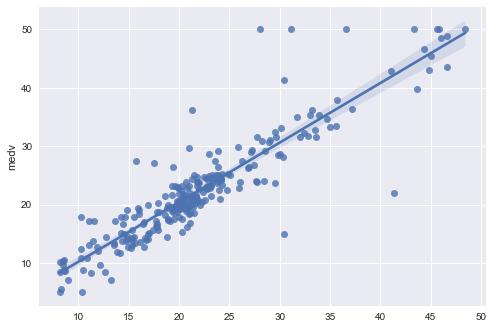

In [19]:
sns.regplot(y_pred, y_test);

In [20]:
boston_rf = RandomForestRegressor(max_features=6, random_state=42, n_estimators=100)
boston_rf.fit(X_train, y_train)

y_pred = boston_rf.predict(X_test)

mean_squared_error(y_test, y_pred)

13.359148822134387

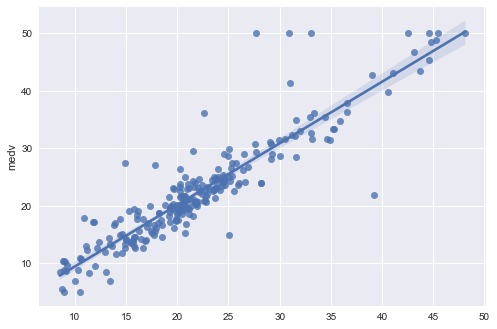

In [21]:
sns.regplot(y_pred, y_test);

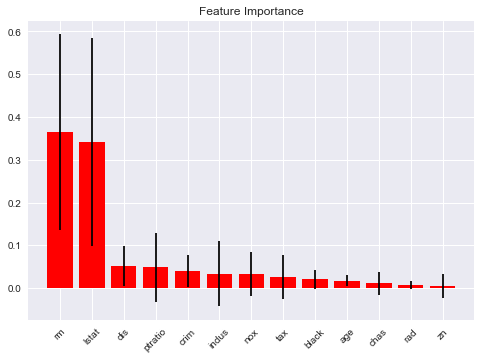

In [22]:
# Feature Importance

plot_feature_importances(boston_rf, 
                         feature_names=X.columns,
                         x_tick_rotation=45);

In [23]:
## boosting

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

boston_gb = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=4, random_state=42)
boston_gb.fit(X_train, y_train)

y_pred = boston_gb.predict(X_test)

mean_squared_error(y_test, y_pred)

16.770864624119454

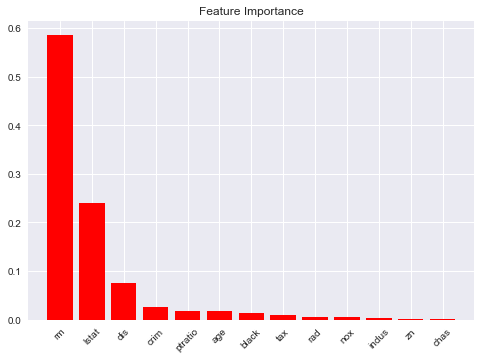

In [25]:
plot_feature_importances(boston_gb, 
                         feature_names=X.columns,
                         x_tick_rotation=45);

C:\Users\lg\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; The function ensemble.plot_partial_dependence has been deprecated in favour of sklearn.inspection.plot_partial_dependence in  0.21 and will be removed in 0.23.
  warnings.warn(msg, category=FutureWarning)
C:\Users\lg\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.
  warnings.warn(msg, category=FutureWarning)
C:\Users\lg\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.
  warnings.warn(msg, category=FutureWarning)


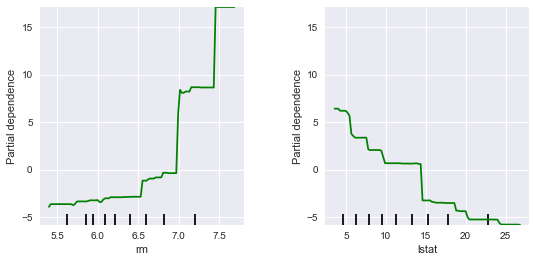

In [26]:
# Partial Dependence Plots

from sklearn.ensemble.partial_dependence import plot_partial_dependence

plot_partial_dependence(boston_gb, X_train, [5, 12], feature_names=X.columns);

In [27]:
boston_gb2 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.2, max_depth=4, random_state=42)
boston_gb2.fit(X_train, y_train) ## lr만 0.2로 바뀜

y_pred = boston_gb2.predict(X_test)

mean_squared_error(y_test, y_pred)

15.276392930363572

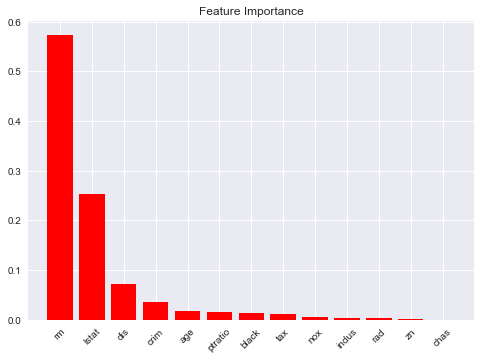

In [28]:
plot_feature_importances(boston_gb2, 
                         feature_names=X.columns,
                         x_tick_rotation=45);